<a href="https://colab.research.google.com/github/Kinghood15/Credit_card_default_in_XGboost.ipynb/blob/main/Credit_card_default_in_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: IMPORT LIBRARIES AND DATASETS

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/ModernAIPortfolioBuilder/BusinessAI/

[Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/ModernAIPortfolioBuilder/BusinessAI/'
/content


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

creditcard_df = pd.read_csv('credit_card_default.csv')


In [ ]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
creditcard_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
creditcard_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
creditcard_df['SEX'].unique()

array([2, 1])

In [ ]:
creditcard_df.info()
# 24 features in total, each contains 30000 data points 
#Tổng cộng có 24 tính năng, mỗi tính năng chứa 30000 điểm dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
creditcard_df.describe()
# the mean for LIMIT_BAL = 1500, min =1, and max = 30000
# the mean for AGE = 25 years old, min = 21, and max = 79
# PAY_AMT average is around 5k


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# TASK #2: VISUALIZE DATASET

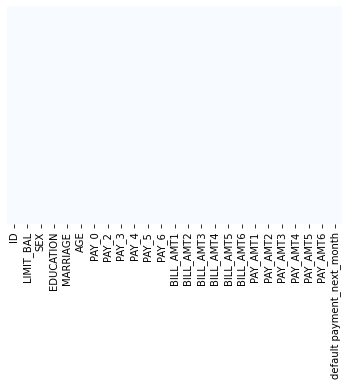

In [ ]:
# Kiểm tra xem có missing data
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac84d09d10>,
      dtype=object)

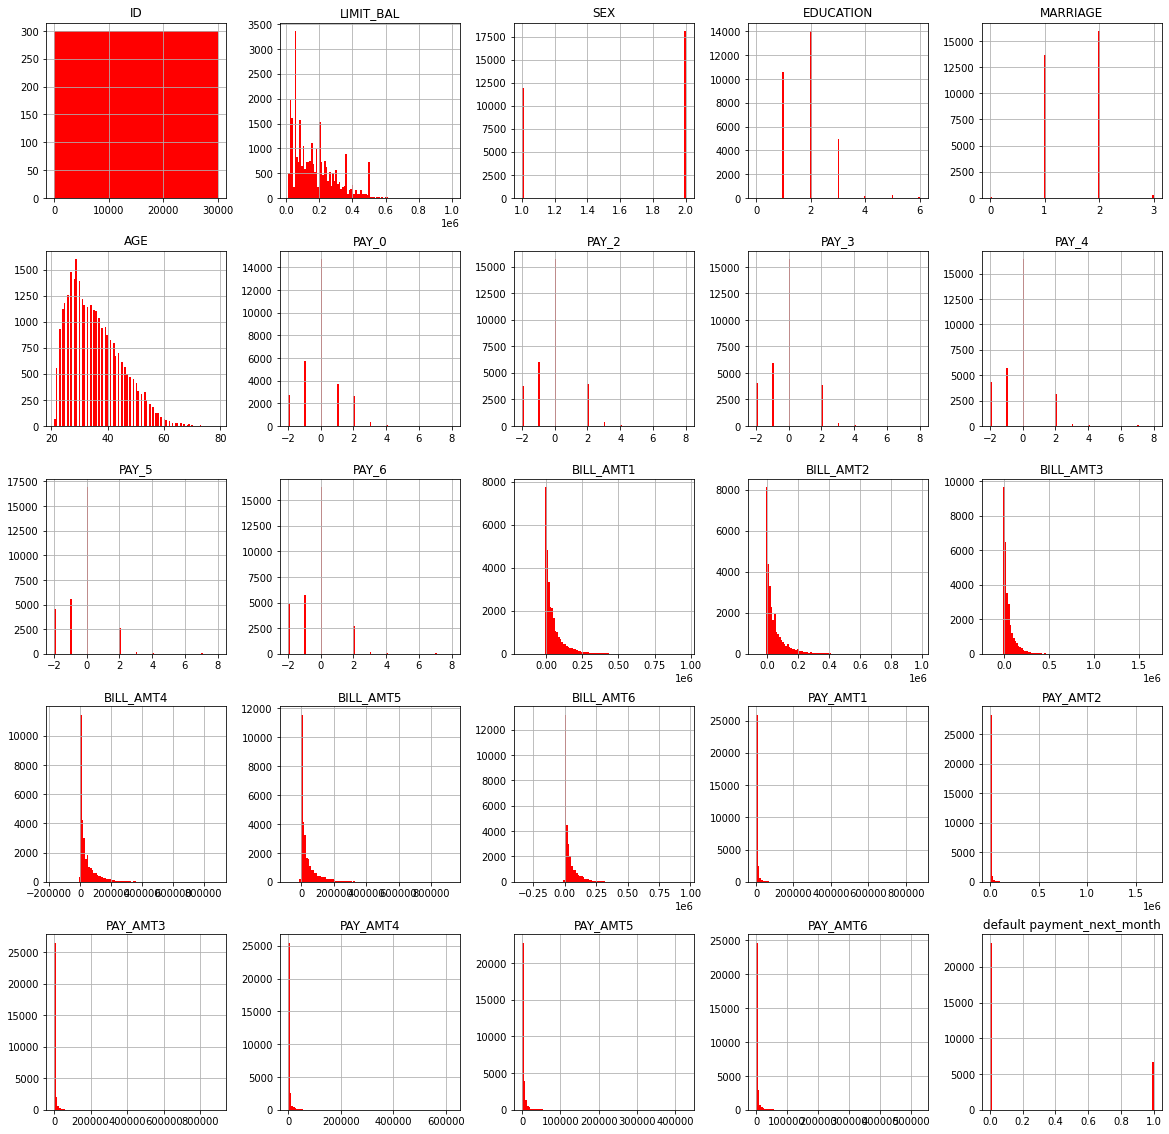

In [ ]:
creditcard_df.hist(bins = 100, figsize = (20,20), color = 'r')


In [ ]:
# Let's drop the ID column
# Bỏ cột ID
creditcard_df.drop(['ID'], axis=1, inplace=True)

In [ ]:
creditcard_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# Hãy xem danh sách bao nhiêu người vỡ nợ và không vợ nợ
cc_default_df        = creditcard_df[creditcard_df['default payment_next_month'] == 1]  #yes
print("Danh sách người không trả được nợ: ")
print(cc_default_df)
cc_nodefault_df      = creditcard_df[creditcard_df['default payment_next_month'] == 0]  #no
print("Danh sách người trả được nợ: ")
print(cc_nodefault_df)

Danh sách người không trả được nợ: 
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
13         70000    1          2         2   30      1      2      2      0   
16         20000    1          1         2   24      0      0      2      2   
21        120000    2          2         1   39     -1     -1     -1     -1   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29991     210000    1          2         1   34      3      2      2      2   
29994      80000    1          2         2   34      2      2      2      2   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  .

In [ ]:

print("Tổng số khách hàng =", len(creditcard_df))

print("Số lượng khách hàng vỡ nợ  =", len(cc_default_df))
print("Phần trăm khách hàng đã vỡ nợ =", 1.*len(cc_default_df)/len(creditcard_df)*100.0, "%")
 
print("Số lượng khách hàng không vỡ nợ =", len(cc_nodefault_df))
print("Phần trăm khách hàng không vỡ nợ =", 1.*len(cc_nodefault_df)/len(creditcard_df)*100.0, "%")

Tổng số khách hàng = 30000
Số lượng khách hàng vỡ nợ  = 6636
Phần trăm khách hàng đã vỡ nợ = 22.12 %
Số lượng khách hàng không vỡ nợ = 23364
Phần trăm khách hàng không vỡ nợ = 77.88000000000001 %


In [ ]:
# Hãy xem danh sách số người không trả được nợ
cc_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [ ]:
# Hãy xem danh sách số người trả được nợ
cc_nodefault_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


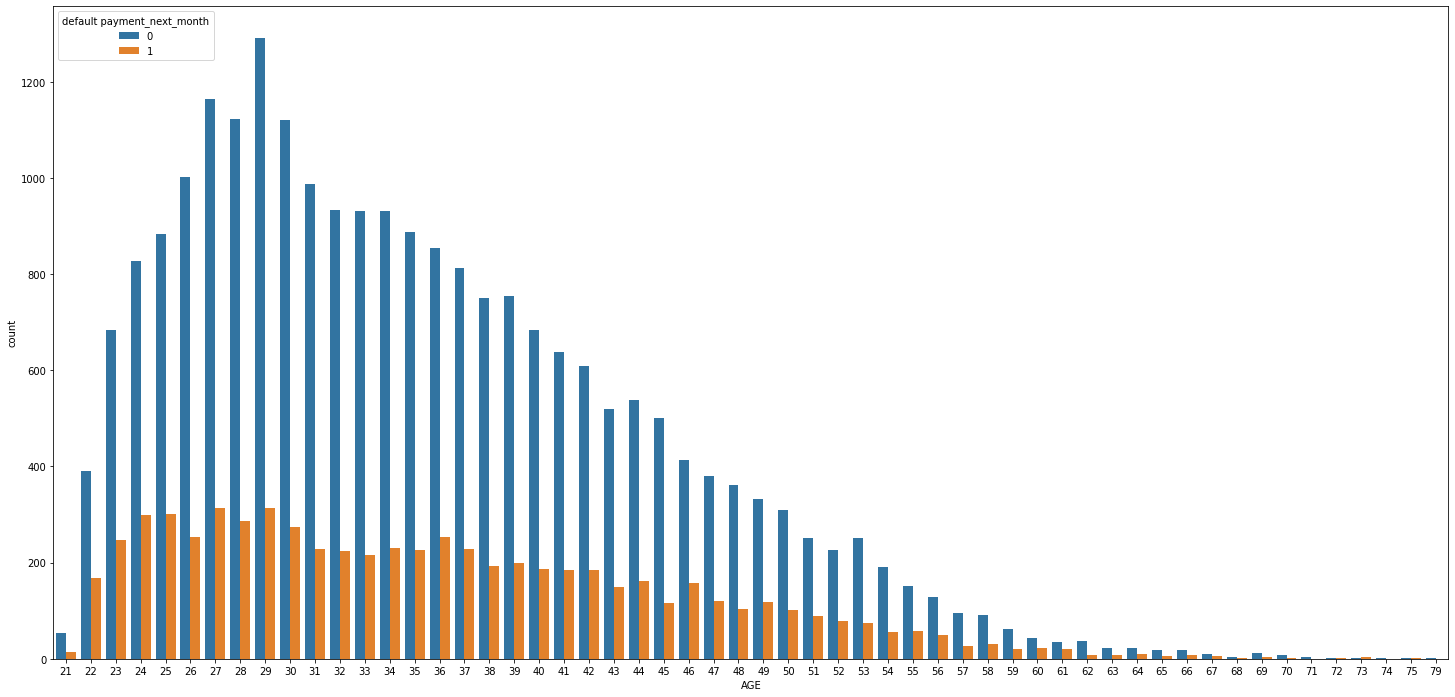

In [ ]:
#Vẽ biểu đồ cột dựa trên tuổi và người vỡ nợ hay không vỡ nợ 
plt.figure(figsize=[25, 12])
sns.countplot(x = 'AGE', hue = 'default payment_next_month', data = creditcard_df)

plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default payment_next_month', data = creditcard_df)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default payment_next_month', data = creditcard_df)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default payment_next_month', data = creditcard_df)


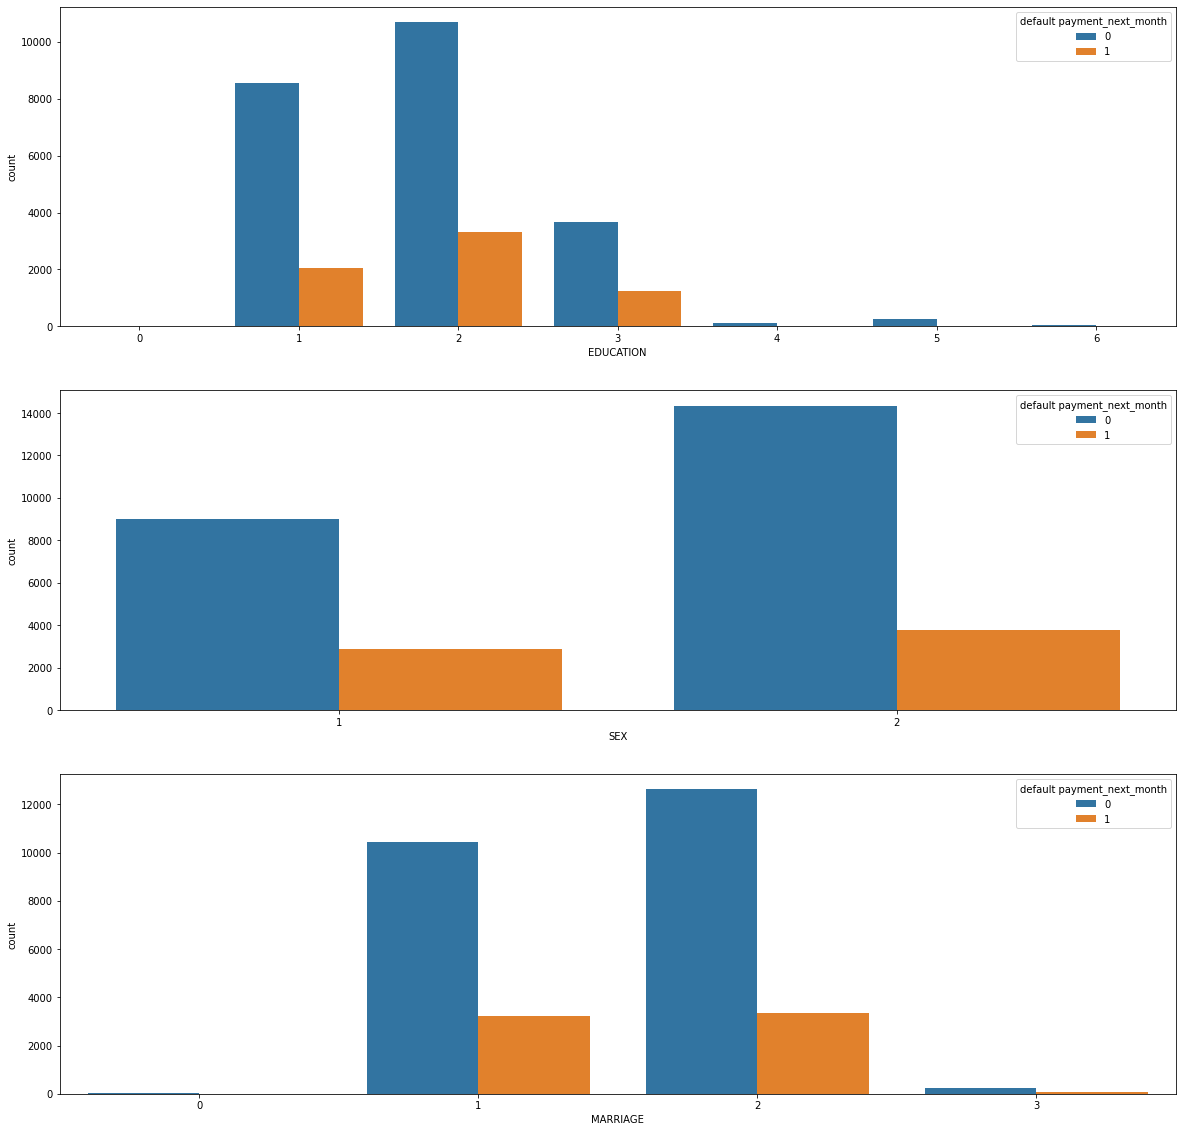

In [ ]:
plt.figure(figsize=[20,20]) 
#Vẽ biểu đồ cột dựa trên học vấn và người vỡ nợ hay không vỡ nợ 
plt.subplot(311) 
sns.countplot(x = 'EDUCATION', hue = 'default payment_next_month', data = creditcard_df) 
#Vẽ biểu đồ cột dựa trên giới tính và người vỡ nợ hay không vỡ nợ 
plt.subplot(312) 
sns.countplot(x = 'SEX', hue = 'default payment_next_month', data = creditcard_df) 
#Vẽ biểu đồ cột dựa trên kết hôn và người vỡ nợ hay không vỡ nợ 
plt.subplot(313) 
sns.countplot(x = 'MARRIAGE', hue = 'default payment_next_month', data = creditcard_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(200000.0, 400000.0)

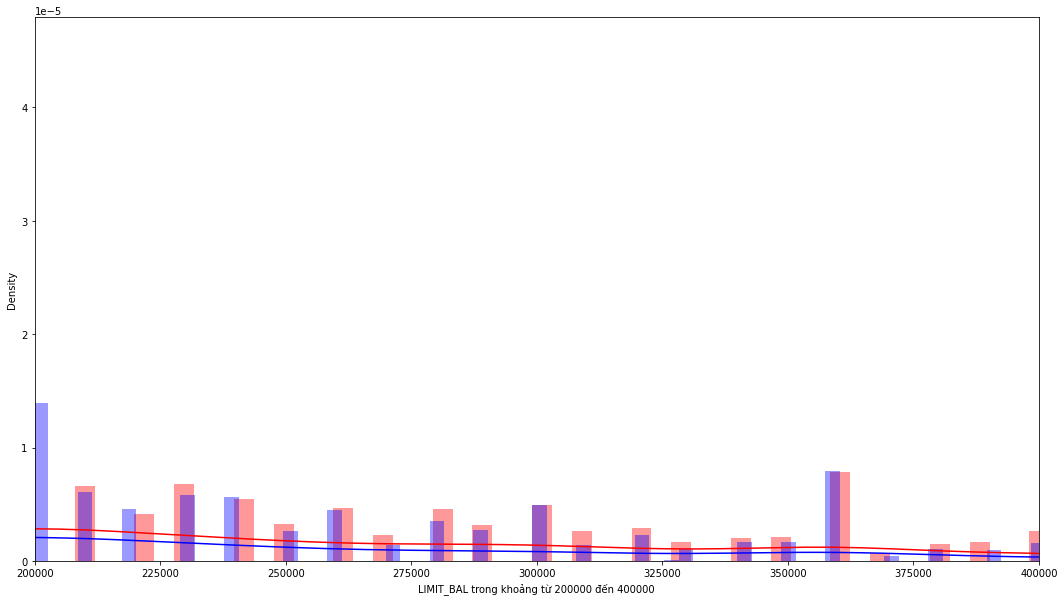

In [ ]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(18,10))

sns.distplot(cc_nodefault_df['LIMIT_BAL'], bins = 250, color = 'r')
sns.distplot(cc_default_df['LIMIT_BAL'], bins = 250, color = 'b')

# plt.xlabel('LIMIT_BAL trong khoảng từ 0 đến 200000')
# plt.xlim(0, 200000)
plt.xlabel('LIMIT_BAL trong khoảng từ 200000 đến 400000')
plt.xlim(200000, 400000)
# plt.xlabel('LIMIT_BAL trong khoảng từ 400000 đến 800000')
# plt.xlim(400000, 800000)
# plt.xlabel('LIMIT_BAL trong khoảng từ 800000 đến 1000000')
# plt.xlim(800000, 1000000)

(0.0, 100000.0)

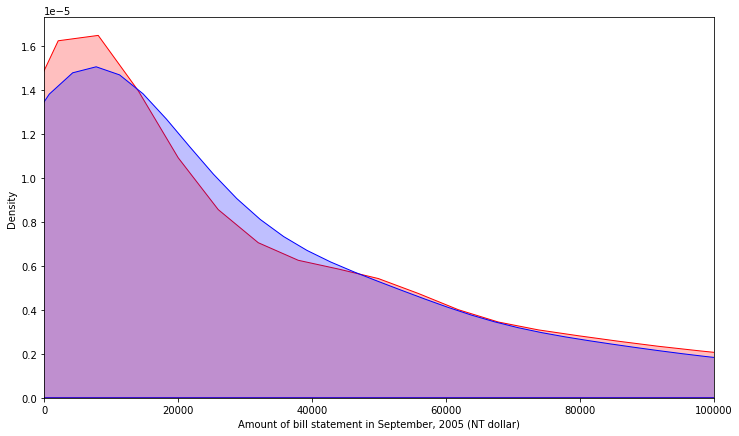

In [ ]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['BILL_AMT1'], label = 'Khách hàng không vỡ nợ (paid balance)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['BILL_AMT1'], label = 'Khách hàng vỡ nợ  (did not pay balance)', shade = True, color = 'b')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')
plt.xlim(0, 100000)


(0.0, 50000.0)

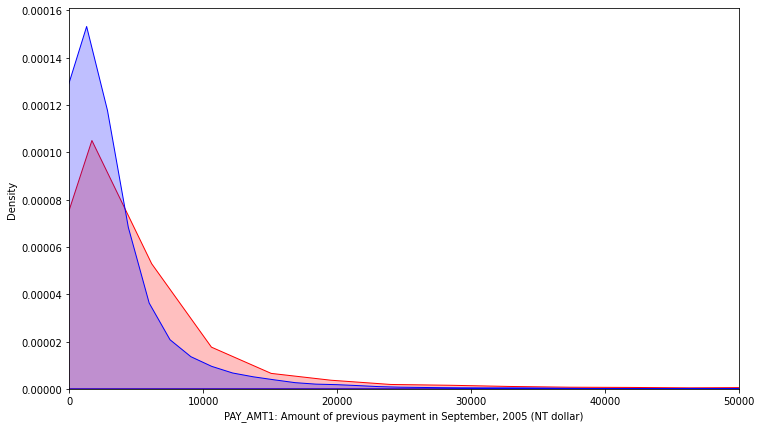

In [ ]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['PAY_AMT1'], label = 'Customers who did not default (paid balance)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['PAY_AMT1'], label = 'Customers who defaulted (did not pay balance)', shade = True, color = 'b')

plt.xlabel('PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)')
plt.xlim(0, 50000)


In [ ]:
# Let's see the impact of sex on the limit balance :Hãy xem tác động của quan hệ tình dục đối với sự cân bằng giới hạn

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df)


In [ ]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df)


# TASK #3: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
creditcard_df



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
X_cat = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat


,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(30000, 13)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat
# SEX 2(1,2) ; EDUCATION: 7 (0,1,2,3,4,5,6) ; MARRIAGE: 4 (0,1,2,3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# note that we dropped the target 'default.payment.next.month'  lưu ý rằng chúng tôi đã bỏ mục tiêu 'default.payment.next.month'
X_numerical = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all


,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689,0,0,0,0,689,0,0,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X 

#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.00161031, 0.        ,
        0.00378311],
       [0.        , 1.        , 0.        , ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [1.        , 0.        , 0.        , ..., 0.00676329, 0.00468901,
        0.00586382],
       [1.        , 0.        , 0.        , ..., 0.00310145, 0.12417444,
        0.00341236],
       [1.        , 0.        , 0.        , ..., 0.00161031, 0.00234451,
        0.00189155]])

In [ ]:
X[0]

array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01010101e-02, 5.17241379e-02, 4.00000000e-01,
       4.00000000e-01, 1.00000000e-01, 1.00000000e-01, 0.00000000e+00,
       0.00000000e+00, 1.49981727e-01, 6.91643226e-02, 8.67228923e-02,
       1.60137756e-01, 8.06480880e-02, 2.60978723e-01, 0.00000000e+00,
       4.09081976e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
y = creditcard_df['default payment_next_month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment_next_month, Length: 30000, dtype: int64

# TASK #4: TRAIN AND EVALUATE AN XGBOOST CLASSIFIER (LOCALLY)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(22500, 33)

In [ ]:
X_test.shape

(7500, 33)

In [ ]:
!pip install xgboost

In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(max_depth=5, objective='reg:squarederror')

In [ ]:
# from matplotlib.image import BboxImage
# from xgboost import plot_tree
# import matplotlib.pyplot as plt
# # plot single tree
# plot_tree(model)
# plt.rcParams['figure.figsize'] = [50, 150]
# plt.show()


In [ ]:
# from matplotlib.image import BboxImage
# from xgboost import plot_tree
# import matplotlib.pyplot as plt
# # plot single tree
# plot_tree(model)
# plt.gcf().set_size_inches(18.5, 10.5)
# plt.show()
# plt.savefig("temp.png")

In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
X_test


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.22061192e-03, 4.68901294e-03, 3.78310691e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.78743961e-03, 4.68901294e-03, 3.78310691e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.28019324e-04, 2.85795339e-02, 1.47541170e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.12721417e-02, 1.64115453e-02, 1.32408742e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.83091787e-02, 1.01871151e-01, 3.78310691e-02]])

In [ ]:
X_test[1]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 5.68965517e-01, 3.00000000e-01,
       4.00000000e-01, 2.00000000e-01, 2.00000000e-01, 2.00000000e-01,
       2.00000000e-01, 1.53784076e-01, 7.37519313e-02, 9.11717827e-02,
       1.68725850e-01, 8.98746164e-02, 2.68282374e-01, 0.00000000e+00,
       6.80417917e-04, 5.25646177e-04, 7.77777778e-04, 1.17694225e-03,
       8.70114590e-04])

In [ ]:
y_test

12211    1
15499    0
8119     0
6364     0
28643    0
        ..
16742    0
6255     1
14155    0
5079     0
11833    0
Name: default payment_next_month, Length: 7500, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Tính chính xác: {} %".format( 100 * accuracy_score(y_pred, y_test)))

Tính chính xác: 81.82666666666667 %


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
row = [0.00000000e+00, 1.00000000e+00, #SEX
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, #EDUCATION
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, #MARRGIE
       2.08080808e-02, # LIMIBALL
       2.24112931e-01, # AGE 
       3.00000000e-01, # PAY_0
       4.00000000e-01, # PAY_2 
       4.00000000e-01, # PAY_3 
       2.00000000e-01, # PAY_4 
       2.00000000e-01, # PAY_5
       1.00000000e-01, # PAY_6
       1.72392312e-01, # BILL_1 
       7.95332101e-02, # BILL_2 
       9.37890678e-02, # BILL_3
       1.73637369e-01, # BILL_4 
       2.54723274e-02, # BILL_5 
       2.21927846e-01, # BILL_6 
       1.73773284e-03, #PAY_AMT_1 
       1.90232367e-04, #PAY_AMT_2 
       1.11602161e-03, #PAY_AMT_3  
       1.61030596e-03, #PAY_AMT_4  
       2.31240647e-03, #PAY_AMT_5 
       6.45376729e-03] #PAY_AMT_6
# vo no
row2 = [0.00000000e+00, 1.00000000e+00, #SEX
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, #EDUCATION
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00, #MARRGIE
       2.08080808e-02, # LIMIBALL
       2.24112931e-01, # AGE 
       3.00000000e-01, # PAY_0
       4.00000000e-01, # PAY_2 
       4.00000000e-01, # PAY_3 
       2.00000000e-01, # PAY_4 
       2.00000000e-01, # PAY_5
       1.00000000e-01, # PAY_6
       1.72392312e-01, # BILL_1 
       7.95332101e-02, # BILL_2 
       6.37890678e-02, # BILL_3 +
       1.73637369e-01, # BILL_4 
       2.54723274e-02, # BILL_5 
       1.21927846e-01, # BILL_6 +
       1.73773284e-03, #PAY_AMT_1 
       2.90232367e-04, #PAY_AMT_2  +
       1.11602161e-03, #PAY_AMT_3  
       1.61030596e-03, #PAY_AMT_4  
       2.31240647e-03, #PAY_AMT_5 
       6.45376729e-03] #PAY_AMT_6



In [ ]:
from numpy import asarray
data_test = asarray([row])

print(data_test) 

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 2.08080808e-02 2.24112931e-01 3.00000000e-01
  4.00000000e-01 4.00000000e-01 2.00000000e-01 2.00000000e-01
  1.00000000e-01 1.72392312e-01 7.95332101e-02 9.37890678e-02
  1.73637369e-01 2.54723274e-02 2.21927846e-01 1.73773284e-03
  1.90232367e-04 1.11602161e-03 1.61030596e-03 2.31240647e-03
  6.45376729e-03]]


In [ ]:
ketqua = model.predict(data_test)
if ketqua == 1: 
  print("Nguời này vỡ nợ")
else:
 print("Nguời này không vỡ nợ");

Nguời này không vỡ nợ


# TASK #5: MAKING PREDITION


In [ ]:
# ĐỌC FILE TEST
df_datatest = pd.read_csv('DataTest.csv')

df_datatest 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,500000,1,2,2,21,9,2,2,2,-1,...,689,124,42,0,20,689,32,234,21,0


In [ ]:
X_cat_test = df_datatest[['SEX', 'EDUCATION', 'MARRIAGE']]

X_cat_test

,SEX,EDUCATION,MARRIAGE
0,1,2,2


In [ ]:
X_cat_default = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]


In [ ]:
# NỔI DATASET TEST VỚI DATASET DEFAULT CỦA SEX, EDUCATION,MARRIAGE
X_cat_all = pd.concat([X_cat_default, X_cat_test])


In [ ]:
X_cat_all = onehotencoder.fit_transform(X_cat_all).toarray()
print(X_cat_all.shape)

# X_cat_all[30000]


(30001, 13)


In [ ]:
X_cat_all = pd.DataFrame(X_cat_all)
X_cat_all

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_numerical_test = df_datatest[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,500000,21,9,2,2,2,-1,1,5142,11,689,124,42,0,20,689,32,234,21,0


In [ ]:
X_numerical_default = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]


In [ ]:
X_numerical_all = pd.concat([X_numerical_default, X_numerical_test] ,ignore_index=True)

X_numerical_all

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,50000,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [ ]:
X_all_test = pd.concat([X_cat_all, X_numerical_all],axis = 1 )
X_all_test

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689,0,0,0,0,689,0,0,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [ ]:
scaler = MinMaxScaler()
X_dataTest = scaler.fit_transform(X_all_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X_dataTest[30000]

In [ ]:
X_dataTest = asarray([X_dataTest[30000]])

print(X_dataTest) 

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 4.94949495e-01 0.00000000e+00 1.00000000e+00
  4.00000000e-01 4.00000000e-01 4.00000000e-01 1.00000000e-01
  3.00000000e-01 1.51069250e-01 6.62308723e-02 8.67228923e-02
  1.60254563e-01 8.06897338e-02 2.60978723e-01 2.28950309e-05
  4.09081976e-04 3.57126914e-05 3.76811594e-04 4.92346359e-05
  0.00000000e+00]]


In [ ]:
ketqua = model.predict(X_dataTest)
if ketqua == 1: 
  print("Nguời này vỡ nợ")
else:
 print("Nguời này không vỡ nợ");

Nguời này vỡ nợ
